In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [3]:
np.random.seed(37)

In [4]:
base = pd.read_csv(r"C:\Users\tancr\Downloads\ml-100k\ml-100k\ua.base", sep='\t', names = ["user_id", "movie_id", "ratings", "timestamp"])

In [5]:
test = pd.read_csv(r"C:\Users\tancr\Downloads\ml-100k\ml-100k\ua.test", sep='\t', names = ["user_id", "movie_id", "ratings", "timestamp"])

In [6]:
matrix_base = base.pivot(values='ratings', index='user_id', columns='movie_id')
matrix_base

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
matrix_test = test.pivot(values='ratings', index='user_id', columns='movie_id')
matrix_test

movie_id,1,2,3,4,5,6,7,8,9,10,...,1591,1592,1600,1612,1617,1646,1653,1656,1662,1664
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
matrix_test = matrix_test.drop([1582, 1653], axis = 1)

In [9]:
m_base = np.array(matrix_base)
m_test = np.array(matrix_test)

In [10]:
m_base = np.nan_to_num(m_base, nan = -1)
m_test = np.nan_to_num(m_test, nan = -1)


m_base = m_base.astype(int)
m_test = m_test.astype(int)

In [12]:
num_item_classes = 6
num_user_classes = 6
num_items = m_base.shape[1]
num_users = m_base.shape[0]
num_ratings = 5

In [13]:
num_item_classes = 6
num_user_classes = 6
num_items = m_base.shape[1]
num_users = m_base.shape[0]
num_ratings = 5
P_Zx = np.random.dirichlet(np.ones(num_item_classes), size=1)[0]
P_Zy = np.random.dirichlet(np.ones(num_user_classes), size=1)[0]
P_x_given_Zx = np.random.dirichlet(np.ones(num_items), size=num_item_classes)
P_y_given_Zy = np.random.dirichlet(np.ones(num_users), size=num_user_classes)
P_r_given_Zx_Zy = np.random.dirichlet(np.ones(num_ratings), size=(num_item_classes, num_user_classes))


In [14]:
def e_step(user_item_matrix, P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy, num_item_classes, num_user_classes):
    num_users, num_items = user_item_matrix.shape
    posterior = np.zeros((num_users, num_items, num_item_classes, num_user_classes))

    for u in range(num_users):
        for i in range(num_items):
            r = user_item_matrix[u, i]
            if r == -1:  # Skip missing ratings
                continue
            for Zx in range(num_item_classes):
                for Zy in range(num_user_classes):
                    posterior[u, i, Zx, Zy] = (P_Zx[Zx] * P_Zy[Zy] *
                                              P_x_given_Zx[Zx, i] * P_y_given_Zy[Zy, u] *
                                              P_r_given_Zx_Zy[Zx, Zy, r - 1])
            posterior[u, i] /= np.sum(posterior[u, i])
    return posterior


In [15]:
r = e_step(m_base, P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy, num_item_classes, num_user_classes)

In [16]:
def m_step(user_item_matrix, posterior, num_item_classes, num_user_classes, num_items, num_users, num_ratings):

    P_Zx = np.sum(posterior, axis=(0, 1, 3)) / np.sum(posterior)
    P_Zy = np.sum(posterior, axis=(0, 1, 2)) / np.sum(posterior)

    P_x_given_Zx = np.zeros((num_item_classes, num_items))
    P_y_given_Zy = np.zeros((num_user_classes, num_users))
    P_r_given_Zx_Zy = np.zeros((num_item_classes, num_user_classes, num_ratings))

    for Zx in range(num_item_classes):
        for i in range(num_items):
            mask = (user_item_matrix[:, i] != -1)
            P_x_given_Zx[Zx, i] = np.sum(posterior[mask, i, Zx, :]) / np.sum(posterior[:, :, Zx, :])

    for Zy in range(num_user_classes):
        for u in range(num_users):
            mask = (user_item_matrix[u, :] != -1)
            P_y_given_Zy[Zy, u] = np.sum(posterior[u, mask, :, Zy]) / np.sum(posterior[:, :, :, Zy])

    for Zx in range(num_item_classes):
        for Zy in range(num_user_classes):
            for r in range(num_ratings):
                mask = (user_item_matrix == (r + 1))
                P_r_given_Zx_Zy[Zx, Zy, r] = np.sum(posterior[mask[:, :, None, None]][..., Zx, Zy]) / np.sum(posterior[:, :, Zx, Zy])

    return P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy

In [17]:
def m_step(user_item_matrix, posterior, num_item_classes, num_user_classes, num_items, num_users, num_ratings):
    L = np.sum(user_item_matrix != -1)  # Total number of observed ratings

    P_Zx = np.sum(posterior, axis=(0, 1, 3)) / L
    P_Zy = np.sum(posterior, axis=(0, 1, 2)) / L

    P_x_given_Zx = np.zeros((num_item_classes, num_items))
    P_y_given_Zy = np.zeros((num_user_classes, num_users))
    P_r_given_Zx_Zy = np.zeros((num_item_classes, num_user_classes, num_ratings))

    for Zx in range(num_item_classes):
        for i in range(num_items):
            mask = (user_item_matrix[:, i] != -1)
            P_x_given_Zx[Zx, i] = np.sum(posterior[mask, i, Zx, :]) / (L * P_Zx[Zx])

    for Zy in range(num_user_classes):
        for u in range(num_users):
            mask = (user_item_matrix[u, :] != -1)
            P_y_given_Zy[Zy, u] = np.sum(posterior[u, mask, :, Zy]) / (L * P_Zy[Zy])

    for Zx in range(num_item_classes):
        for Zy in range(num_user_classes):
            for r in range(num_ratings):
                mask = (user_item_matrix == (r + 1))
                P_r_given_Zx_Zy[Zx, Zy, r] = np.sum(posterior[mask][:, Zx, Zy]) / np.sum(posterior[:, :, Zx, Zy])

    return P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy

In [18]:
a, b, c, d, e = m_step(m_base, r, num_item_classes, num_user_classes, num_items, num_users, num_ratings)

In [19]:

def compute_log_likelihood(user_item_matrix, P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy):
    log_likelihood = 0
    num_users, num_items = user_item_matrix.shape
    for u in range(num_users):
        for i in range(num_items):
            r = user_item_matrix[u, i]
            if r == -1:  # Skip missing ratings
                continue
            prob = 0
            for Zx in range(len(P_Zx)):
                for Zy in range(len(P_Zy)):
                    prob += (P_Zx[Zx] * P_Zy[Zy] *
                             P_x_given_Zx[Zx, i] * P_y_given_Zy[Zy, u] *
                             P_r_given_Zx_Zy[Zx, Zy, r - 1])
            log_likelihood += np.log(prob)
    return log_likelihood


In [20]:
compute_log_likelihood(m_base, P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy)

-1462578.4449420946

In [21]:
def fit(user_item_matrix, P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy, num_user_classes, num_item_classes, num_users, num_items, num_ratings, max_iter=100):

    log_likelihoods = []

    for i in range(max_iter):
        posterior = e_step(user_item_matrix, P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy, num_item_classes, num_user_classes)
        P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy = m_step(user_item_matrix, posterior, num_item_classes, num_user_classes, num_items, num_users, num_ratings)
        log_likelihood = compute_log_likelihood(user_item_matrix, P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy)
        log_likelihoods.append(log_likelihood)
        print(f'{i=}', f'{log_likelihood=}')

    return P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy, log_likelihoods

In [124]:
p1, p2, p3, p4, p5, p6 = fit(m_base, P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy, num_user_classes, num_item_classes, num_users, num_items, num_ratings, 100)

i=0 log_likelihood=-1323057.6137473842
i=1 log_likelihood=-1321920.8573831867
i=2 log_likelihood=-1320846.6562072868
i=3 log_likelihood=-1319468.8734773232
i=4 log_likelihood=-1317595.2290977514
i=5 log_likelihood=-1315190.8810881912
i=6 log_likelihood=-1312504.3843068592
i=7 log_likelihood=-1309951.7326000817
i=8 log_likelihood=-1307793.0047036961
i=9 log_likelihood=-1306067.9083398932
i=10 log_likelihood=-1304707.8417237534
i=11 log_likelihood=-1303634.2182656915
i=12 log_likelihood=-1302785.0119615037
i=13 log_likelihood=-1302109.7523039465
i=14 log_likelihood=-1301567.4527420106
i=15 log_likelihood=-1301124.7233241894
i=16 log_likelihood=-1300755.1279530232
i=17 log_likelihood=-1300439.1674829805
i=18 log_likelihood=-1300163.3360855882
i=19 log_likelihood=-1299918.24995474
i=20 log_likelihood=-1299697.21274767
i=21 log_likelihood=-1299495.3495545122
i=22 log_likelihood=-1299309.0863217623
i=23 log_likelihood=-1299135.834054223
i=24 log_likelihood=-1298973.7061447182
i=25 log_likeli

Text(0, 0.5, 'Observed Log Likelihood')

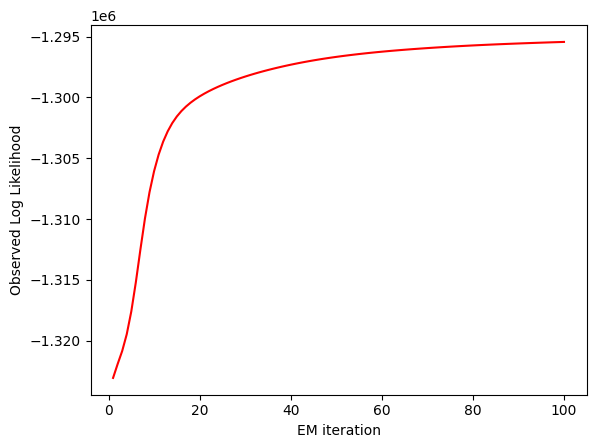

In [233]:
plt.plot(np.arange(1,101), f, 'r-')
plt.xlabel("EM iteration")
plt.ylabel("Observed Log Likelihood")

In [171]:
import numpy as np

# Assuming the necessary parameters have already been learned
# P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy

def fold_in(user_item_matrix, P_Zy, P_y_given_Zy, num_user_classes, test_user_ratings):

    
    
    num_items = user_item_matrix.shape[1]

    print(num_items)

    posterior_y = np.zeros((num_items, num_user_classes))
    
    for i in range(num_items):
        r = test_user_ratings[i]
        if r == -1:  # Skip missing ratings
            continue
        r = r - 1  # Adjust rating to be zero-indexed
        for Zy in range(num_user_classes):
            posterior_y[i, Zy] = P_Zy[Zy] * P_y_given_Zy[Zy, i]
        posterior_y[i] /= np.sum(posterior_y[i])
    
    # Update P(y_t|Z_y)
    P_y_t_given_Zy = np.sum(posterior_y, axis=0) / np.sum(posterior_y)
    return P_y_t_given_Zy

def predict_rating(P_Zx, P_Zy, P_x_given_Zx, P_y_t_given_Zy, P_r_given_Zx_Zy, item_id, num_item_classes, num_user_classes, num_ratings):

    numerators = np.zeros(num_ratings)
    denominator = 0

    for Zx in range(num_item_classes):
        for Zy in range(num_user_classes):
            for r in range(num_ratings):
                joint_prob = (P_Zx[Zx] * P_Zy[Zy] * P_y_t_given_Zy[Zy] * P_x_given_Zx[Zx, item_id] * P_r_given_Zx_Zy[Zx, Zy, r])
                
                numerators[r] += joint_prob * (r + 1)  # Convert back to 1-based rating
                denominator += joint_prob
    predicted_rating = np.sum(numerators) / denominator
    return predicted_rating


In [163]:
predict_rating(p1, p2, p3, p4[:,1], p5, 944, 6, 6, 5)

3.9664095686702563

In [130]:
pp = predict_rating(p1, p2, p3, daghe, p5, 1, 6, 6, 5)

In [132]:
dic = {}
c = 0
for i in matrix_test.columns:
  dic[c] = i
  c += 1

dic_items_test = dic

In [133]:
dic = {}
c = 0
for i in matrix_base.columns:
  dic[i] = c
  c += 1

dic_items_base = dic

In [174]:
predictions = []


for i in range(num_users):
    
    for j in range(m_test.shape[1]):

        if m_test[i,j] != -1:
            
            item_trans = dic_items_test[j]
            index_item = dic_items_base[item_trans]

            print(i,index_item)

            pred = predict_rating(p1, p2, p3, p4[:,i], p5, index_item, 6, 6, 5)

            predictions.append(pred)
        


        

0 19
0 32
0 60
0 116
0 154
0 159
0 170
0 188
0 201
0 264
1 12
1 49
1 250
1 279
1 280
1 289
1 291
1 296
1 311
1 313
2 244
2 293
2 322
2 327
2 330
2 331
2 333
2 334
2 336
2 342
3 49
3 259
3 263
3 287
3 293
3 302
3 353
3 355
3 356
3 360
4 0
4 1
4 16
4 97
4 109
4 224
4 362
4 423
4 438
4 453
5 13
5 22
5 68
5 85
5 97
5 257
5 300
5 462
5 491
5 516
6 31
6 162
6 381
6 429
6 454
6 478
6 491
6 496
6 647
6 660
7 21
7 49
7 78
7 88
7 181
7 293
7 337
7 384
7 456
7 549
8 5
8 285
8 297
8 339
8 478
8 486
8 506
8 520
8 526
8 690
9 6
9 15
9 99
9 174
9 284
9 460
9 485
9 487
9 503
9 610
10 37
10 109
10 110
10 226
10 424
10 557
10 722
10 724
10 731
10 739
11 81
11 95
11 96
11 131
11 142
11 171
11 203
11 299
11 470
11 734
12 55
12 97
12 185
12 197
12 214
12 271
12 343
12 359
12 525
12 835
13 21
13 97
13 110
13 173
13 212
13 268
13 356
13 473
13 529
13 708
14 24
14 126
14 221
14 330
14 404
14 472
14 677
14 684
14 748
14 931
15 7
15 54
15 63
15 88
15 177
15 193
15 196
15 208
15 704
15 943
16 0
16 8
16 12
16 116

In [176]:
predictions = np.array(predictions)

In [178]:
len(predictions)

9428

In [181]:
real = m_test[m_test != -1]

In [185]:
np.mean(np.abs(predictions - real))

0.7611554095044104

In [186]:
P_x_given_Zx.shape

(6, 1680)

In [203]:
#### Compute \( P(Z_x | x) \)
def compute_P_Zx_given_x_bayes(P_x_given_Zx, P_Zx):
    num_item_classes, num_items  = P_x_given_Zx.shape
    P_Zx_given_x = np.zeros((num_items, num_item_classes))
    
    for i in range(num_items):
        marginal_x = np.sum(P_x_given_Zx[:, i] * P_Zx)
        for Zx in range(num_item_classes):
            P_Zx_given_x[i, Zx] = (P_x_given_Zx[Zx, i] * P_Zx[Zx]) / marginal_x
    
    return P_Zx_given_x


#### Compute \( P(Z_y | y) \)
def compute_P_Zy_given_y_bayes(P_y_given_Zy, P_Zy):
    num_user_classes, num_users = P_y_given_Zy.shape
    P_Zy_given_y = np.zeros((num_users, num_user_classes))
    
    for u in range(num_users):
        marginal_y = np.sum(P_y_given_Zy[:, u] * P_Zy)
        for Zy in range(num_user_classes):
            P_Zy_given_y[u, Zy] = (P_y_given_Zy[Zy, u] * P_Zy[Zy]) / marginal_y
    
    return P_Zy_given_y

In [202]:
P_y_given_Zy.shape

(6, 943)

In [208]:
bayes_x = compute_P_Zx_given_x_bayes(p3, p1)

In [209]:
bayes_y = compute_P_Zy_given_y_bayes(p4, p2)

In [1]:
bayes_x[0]

NameError: name 'bayes_x' is not defined

In [223]:
max_class_x = np.zeros((1680, 2), dtype = int)

In [224]:
max_class_y = np.zeros((943, 2), dtype = int)

In [225]:
for i in range(1680):
    max_class_x[i,0] = i
    max_class_x[i,1] = np.argmax(bayes_x[i,:])


In [226]:
for i in range(943):
    max_class_y[i,0] = i
    max_class_y[i,1] = np.argmax(bayes_y[i,:])

In [228]:
max_class_x

array([[   0,    0],
       [   1,    3],
       [   2,    3],
       ...,
       [1677,    3],
       [1678,    4],
       [1679,    4]])

In [231]:
np.save('max_class_x.npy', max_class_x)
np.save('max_class_y.npy', max_class_y)

In [234]:
np.save('p1.npy', p1)
np.save('p2.npy', p2)
np.save('p3.npy', p3)
np.save('p4.npy', p4)
np.save('p5.npy', p5)
np.save('p6.npy', p6)

In [235]:
p6

[-1323057.6137473842,
 -1321920.8573831867,
 -1320846.6562072868,
 -1319468.8734773232,
 -1317595.2290977514,
 -1315190.8810881912,
 -1312504.3843068592,
 -1309951.7326000817,
 -1307793.0047036961,
 -1306067.9083398932,
 -1304707.8417237534,
 -1303634.2182656915,
 -1302785.0119615037,
 -1302109.7523039465,
 -1301567.4527420106,
 -1301124.7233241894,
 -1300755.1279530232,
 -1300439.1674829805,
 -1300163.3360855882,
 -1299918.24995474,
 -1299697.21274767,
 -1299495.3495545122,
 -1299309.0863217623,
 -1299135.834054223,
 -1298973.7061447182,
 -1298821.2563105605,
 -1298677.333064653,
 -1298541.0257700924,
 -1298411.60653833,
 -1298288.4722148222,
 -1298171.1021301395,
 -1298059.03323634,
 -1297951.8547196956,
 -1297849.2099427085,
 -1297750.788978092,
 -1297656.3256335764,
 -1297565.606091184,
 -1297478.4632174612,
 -1297394.7533901236,
 -1297314.3490554905,
 -1297237.1603811907,
 -1297163.119899559,
 -1297092.1200341582,
 -1297023.9713749588,
 -1296958.4917464124,
 -1296895.7260150518,
 

In [236]:
p1

array([0.25088615, 0.10709841, 0.11771002, 0.17911833, 0.15357557,
       0.19161152])

In [22]:
like = []


for i in range(2,11):

    num_item_classes = i
    num_user_classes = i
    num_items = m_base.shape[1]
    num_users = m_base.shape[0]
    num_ratings = 5
    P_Zx = np.random.dirichlet(np.ones(num_item_classes), size=1)[0]
    P_Zy = np.random.dirichlet(np.ones(num_user_classes), size=1)[0]
    P_x_given_Zx = np.random.dirichlet(np.ones(num_items), size=num_item_classes)
    P_y_given_Zy = np.random.dirichlet(np.ones(num_users), size=num_user_classes)
    P_r_given_Zx_Zy = np.random.dirichlet(np.ones(num_ratings), size=(num_item_classes, num_user_classes))
    s1, s2, s3, s4, s5, likelihood = fit(m_base, P_Zx, P_Zy, P_x_given_Zx, P_y_given_Zy, P_r_given_Zx_Zy, num_user_classes, num_item_classes, num_users, num_items, num_ratings, 100)
    like.append(likelihood)


i=0 log_likelihood=-1326058.8203071665
i=1 log_likelihood=-1323940.5182062502
i=2 log_likelihood=-1323129.5381554016
i=3 log_likelihood=-1322683.0035543186
i=4 log_likelihood=-1322370.769502388
i=5 log_likelihood=-1322103.0217007769
i=6 log_likelihood=-1321832.1157078554
i=7 log_likelihood=-1321524.3593532536
i=8 log_likelihood=-1321149.118530395
i=9 log_likelihood=-1320674.4120821196
i=10 log_likelihood=-1320066.8719381792
i=11 log_likelihood=-1319299.77597048
i=12 log_likelihood=-1318372.0707422094
i=13 log_likelihood=-1317331.278959917
i=14 log_likelihood=-1316277.6129410795
i=15 log_likelihood=-1315331.0868663955
i=16 log_likelihood=-1314577.3193064597
i=17 log_likelihood=-1314032.2654078412
i=18 log_likelihood=-1313656.193970561
i=19 log_likelihood=-1313393.5408218994
i=20 log_likelihood=-1313199.083479446
i=21 log_likelihood=-1313044.1285373247
i=22 log_likelihood=-1312912.1819011169
i=23 log_likelihood=-1312794.0649291892
i=24 log_likelihood=-1312685.2152854328
i=25 log_likeliho

In [35]:
likel = np.array(like)

In [36]:
likel

array([[-1326058.82030717, -1323940.51820625, -1323129.5381554 ,
        -1322683.00355432, -1322370.76950239, -1322103.02170078,
        -1321832.11570786, -1321524.35935325, -1321149.11853039,
        -1320674.41208212, -1320066.87193818, -1319299.77597048,
        -1318372.07074221, -1317331.27895992, -1316277.61294108,
        -1315331.0868664 , -1314577.31930646, -1314032.26540784,
        -1313656.19397056, -1313393.5408219 , -1313199.08347945,
        -1313044.12853732, -1312912.18190112, -1312794.06492919,
        -1312685.21528543, -1312583.43808058, -1312487.42713485,
        -1312396.0240866 , -1312308.21129049, -1312223.25832995,
        -1312140.56437089, -1312059.7019466 , -1311980.3106776 ,
        -1311901.63703662, -1311822.79343604, -1311742.88606025,
        -1311660.61170641, -1311574.37020918, -1311482.53171833,
        -1311383.37049291, -1311275.02059916, -1311155.6047353 ,
        -1311023.39275425, -1310876.91525867, -1310715.03832113,
        -1310536.98645861

In [32]:
lik = likelihood.reshape(10,10)

ValueError: x and y must have same first dimension, but have shapes (9,) and (10,)

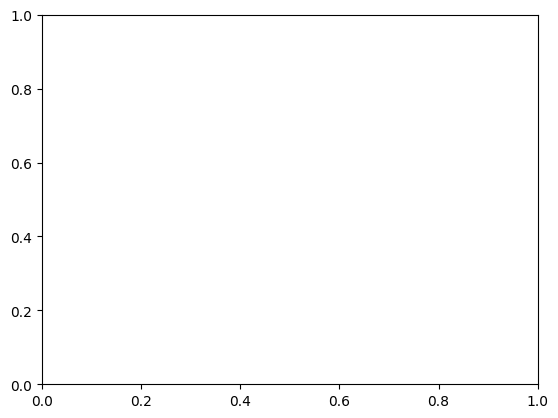

In [33]:
plt.plot(np.arange(2,11), lik[:,-1])